In [ ]:
import pandas as pd
df = pd.read_csv('/content/gurgaon_properties_cleaned_v2.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [ ]:
df.duplicated().sum()

np.int64(126)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


<Axes: xlabel='property_type'>

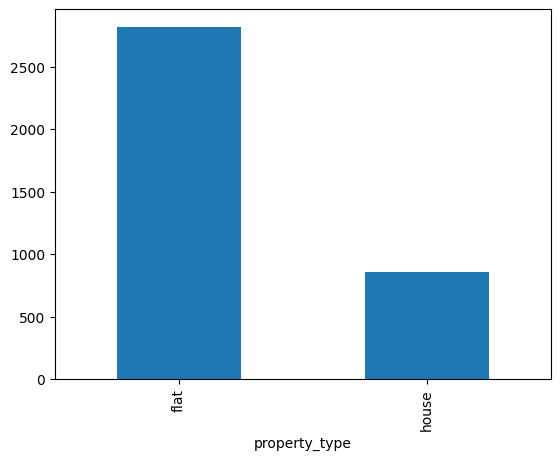

In [ ]:
df['property_type'].value_counts().plot(kind='bar')

In [ ]:
df['society'].value_counts()

,count
society,
independent,486
tulip violet,75
ss the leaf,73
shapoorji pallonji joyville gurugram,42
dlf new town heights,42
...,...
rail vihar cghs,1
rk tower,1
antriksh green,1


In [ ]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


In [ ]:
df['sector'].value_counts().shape

(104,)

In [ ]:
df['price'].isnull().sum()

np.int64(17)

In [ ]:
df['price'].describe()

,price
count,3660.000000
mean,2.533664
std,2.980623
min,0.070000
25%,0.950000
50%,1.520000
75%,2.750000
max,31.500000


the mean price at gurgoan is 2.53 crore and it has std of 2.98 so is has much variance than expected


In [ ]:
import seaborn as sns

<Axes: xlabel='price', ylabel='Count'>

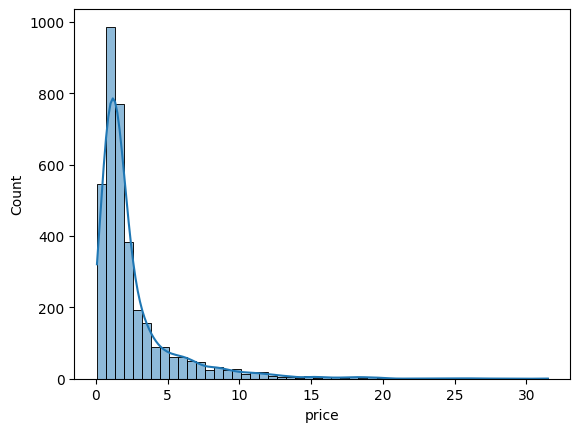

In [ ]:
sns.histplot(df['price'],kde=True,bins = 50)

<Axes: ylabel='price'>

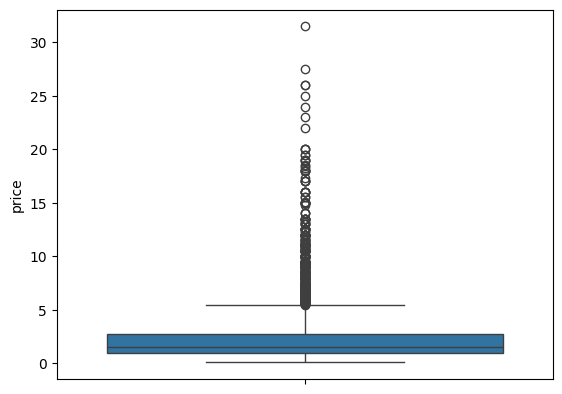

In [ ]:
sns.boxplot(df['price'])

In [ ]:
skewness = df['price'].skew()
kurtosis = df['price'].kurtosis()
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 3.2791704733134623
Kurtosis: 14.933372629214258


skewness tells you that how much skew it is so 3.27 is much larrger value ideal skewness is -0.5 to 0.5

kurtosis is 14.93 which tells us there are lot of outliers ideal vlaue is 3

In [ ]:
quantiles = df['price'].quantile([0.01,0.05,0.95,0.99])

In [ ]:
quantiles

,price
0.01,0.250
0.05,0.370
0.95,8.500
0.99,15.264


In [ ]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

In [ ]:
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5* iqr

In [ ]:
upper

np.float64(5.45)

In [ ]:
outliers = df[(df['price'] < lower) | (df['price'] > upper)]

In [ ]:
outliers.describe()

,price,price_per_sqft,area,bedRoom,bathroom,floorNum,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
count,425.000000,425.000000,425.000000,425.000000,425.000000,416.000000,47.000000,363.000000,96.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,9.235624,36456.475294,4197.647059,5.640000,5.957647,4.564904,3969.893617,3224.379504,2921.781250,0.432941,0.762353,0.294118,0.496471,0.110588,0.687059,74.802353
std,4.065259,51784.501266,6294.717109,2.934795,3.055014,5.574954,1305.257317,2058.902187,2749.703663,0.496067,0.426143,0.456182,0.500577,0.313991,0.657645,50.438815
min,5.460000,1560.000000,190.000000,1.000000,1.000000,0.000000,2329.000000,140.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.460000,19488.000000,2475.000000,4.000000,4.000000,2.000000,3012.500000,1935.000000,349.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,35.000000
50%,8.000000,26389.000000,3240.000000,5.000000,5.000000,3.000000,3395.000000,3195.000000,2450.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,62.000000
75%,10.750000,35222.000000,4500.000000,6.000000,6.000000,4.000000,4651.500000,4500.000000,3985.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,117.000000
max,31.500000,600000.000000,98978.000000,18.000000,20.000000,51.000000,10000.000000,11286.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,174.000000


our output col(price) is right skewed so we can apply log transformation to check whether we can get any better imporvement or not

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

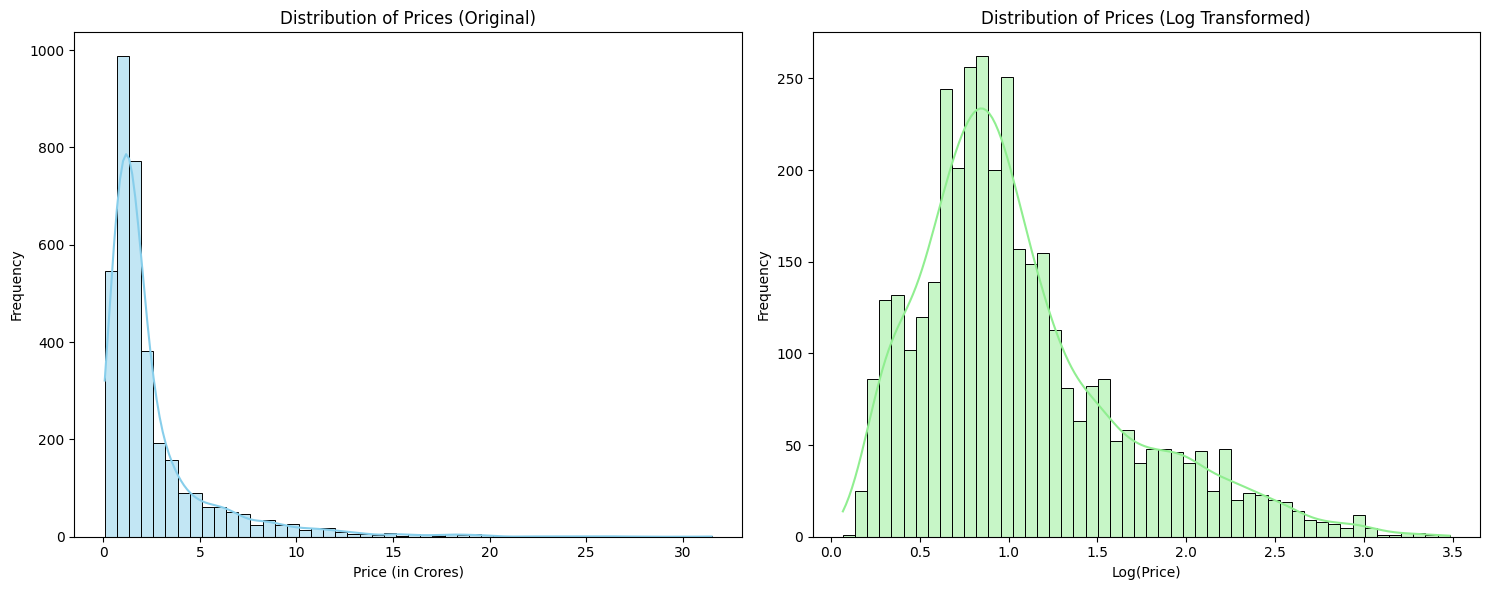

In [ ]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

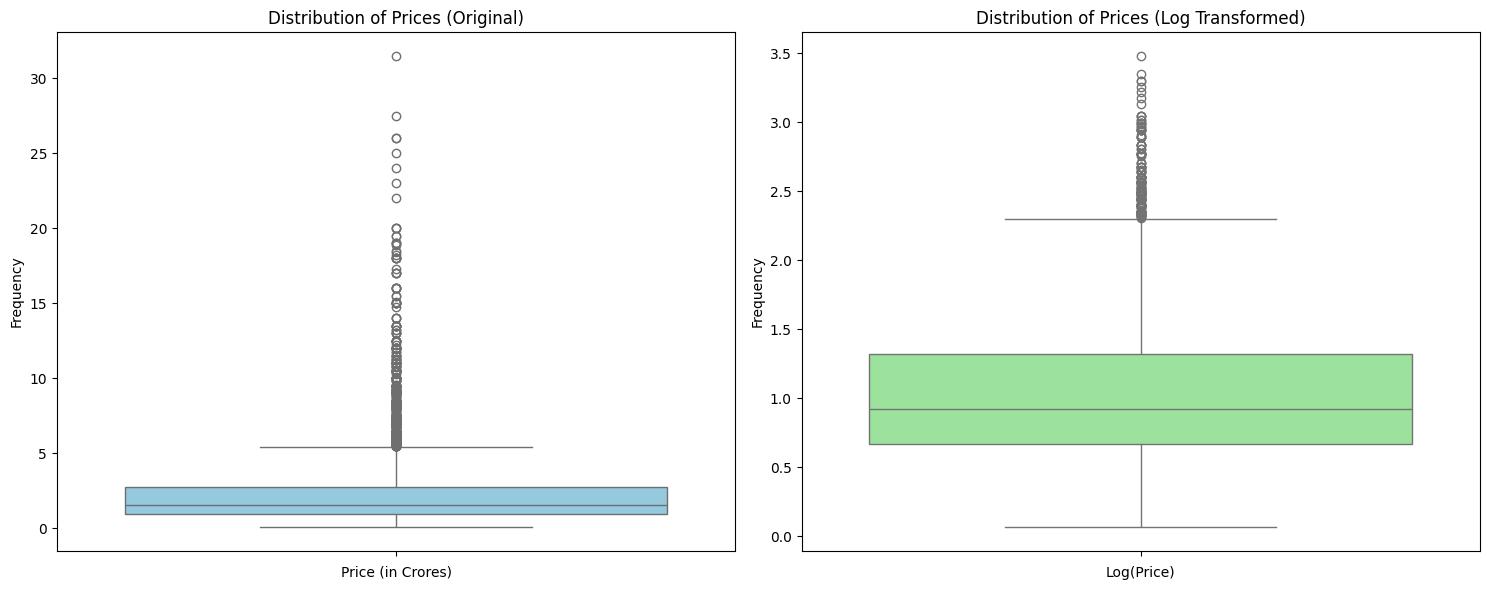

In [ ]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df['price_per_sqft'].isnull().sum()

np.int64(17)

In [ ]:
df[df['price_per_sqft'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
38,house,emaar mgf marbella,sector 66,NaN,NaN,NaN,Plot area 350(292.64 sq.m.),5,5,3,...,NaN,350.0,NaN,0,0,0,0,0,1,22
304,house,not applicable,sector 4,NaN,NaN,NaN,Plot area 670(560.21 sq.m.),5,3,2,...,NaN,670.0,NaN,0,0,0,0,0,0,0
401,house,independent,sector 11,NaN,NaN,NaN,Plot area 1000(92.9 sq.m.),2,2,1,...,NaN,1000.0,NaN,0,0,0,0,0,0,0
596,house,emaar mgf marbella,sector 66,NaN,NaN,NaN,Plot area 350(292.64 sq.m.)Built Up area: 6500...,4,4,3+,...,NaN,6500.0,NaN,1,1,1,1,0,0,136
813,house,unitech greenwood city,sector 45,NaN,NaN,NaN,Plot area 240(200.67 sq.m.),9,9,3+,...,NaN,240.0,NaN,1,1,0,0,0,2,110
922,house,emaar mgf marbella,sector 66,NaN,NaN,NaN,Plot area 350(292.64 sq.m.),5,5,3+,...,NaN,350.0,NaN,1,1,0,1,0,1,160
1419,house,unitech uniworld resorts,sector 33,NaN,NaN,NaN,Plot area 502(419.74 sq.m.),5,7,3+,...,NaN,502.0,NaN,0,1,0,0,0,0,87
1481,house,independent,sector 25,NaN,NaN,NaN,Plot area 502(419.74 sq.m.)Built Up area: 450 ...,5,5,3+,...,NaN,450.0,400.000000,1,1,0,1,1,1,49
1974,flat,signature global orchard avenue 2,sector 93,NaN,NaN,NaN,Carpet area: 577.11 (53.62 sq.m.),2,2,3,...,NaN,NaN,577.160318,0,0,0,0,0,0,104
2013,house,dlf city plot phase 3,sector 24,NaN,NaN,NaN,Built Up area: 5000 (464.52 sq.m.),5,5,3+,...,NaN,5000.0,NaN,0,0,0,0,0,0,0


In [ ]:
df['price_per_sqft'].describe()

,price_per_sqft
count,3660.000000
mean,13892.668306
std,23210.067190
min,4.000000
25%,6817.250000
50%,9020.000000
75%,13880.500000
max,600000.000000


<Axes: xlabel='price_per_sqft', ylabel='Count'>

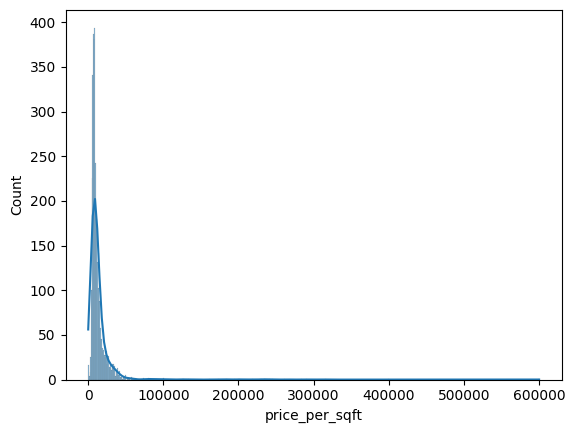

In [ ]:
sns.histplot(df['price_per_sqft'],kde=True)

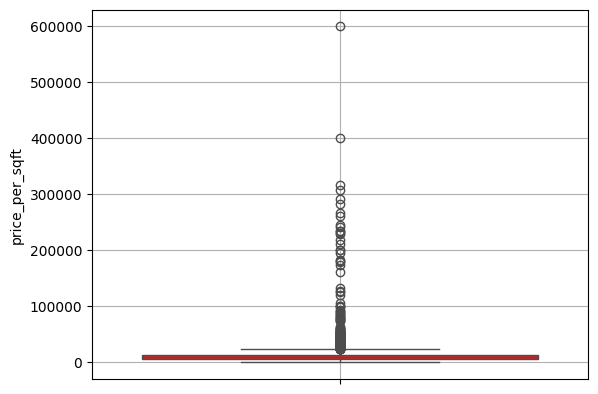

In [ ]:
sns.boxplot(df['price_per_sqft'],color = 'red')
plt.grid()

price per sqft col has much more outliers than thought anfd viscus is very compact so need to be carfull while dealing this

In [ ]:
df['bedRoom'].isnull().sum()

np.int64(0)

<Axes: xlabel='bedRoom', ylabel='count'>

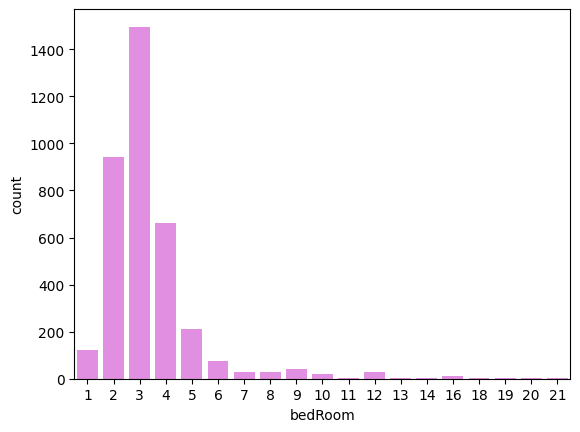

In [ ]:
sns.barplot(df['bedRoom'].value_counts(),color = 'violet')

In [ ]:
df['bathroom'].isnull().sum()

np.int64(0)

<Axes: xlabel='bathroom', ylabel='count'>

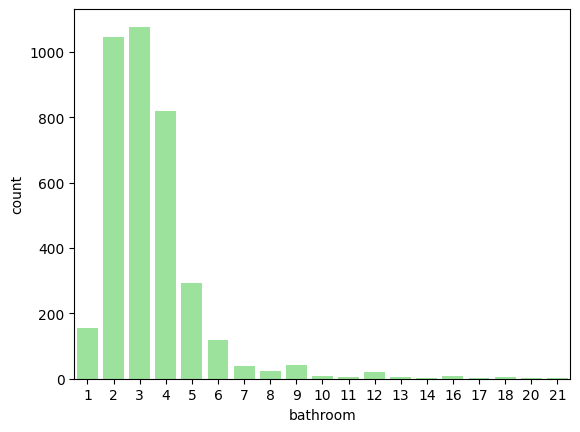

In [ ]:
sns.barplot(df['bathroom'].value_counts(),color = 'lightgreen')

<Axes: xlabel='balcony'>

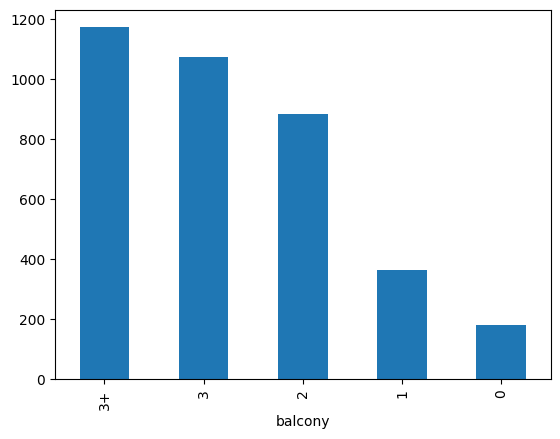

In [ ]:
df['balcony'].value_counts().plot(kind = 'bar')

In [ ]:
df['floorNum'].isnull().sum()

np.int64(19)

In [ ]:
df['floorNum'].describe()

,floorNum
count,3658.000000
mean,6.798250
std,6.012454
min,0.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,51.000000


<Axes: ylabel='floorNum'>

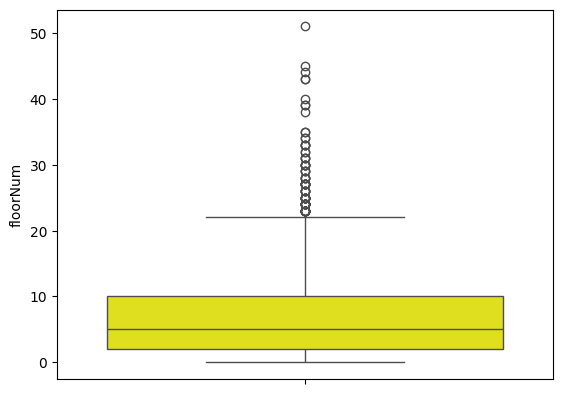

In [ ]:
sns.boxplot(df['floorNum'],color = 'yellow')

In [ ]:
df['facing'].isnull().sum()

np.int64(1045)

<Axes: xlabel='facing'>

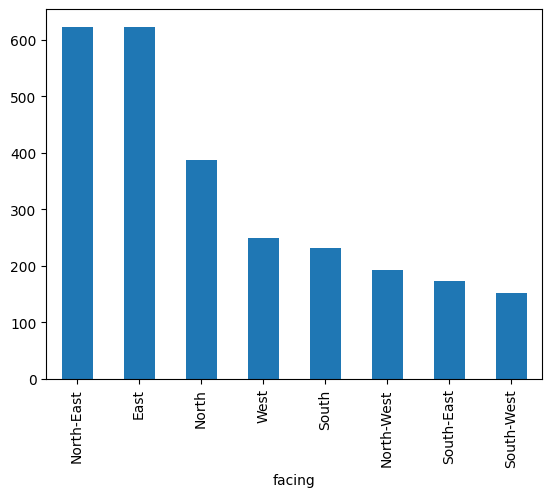

In [ ]:
df['facing'].value_counts().plot(kind = 'bar')

all the cols help in multi variate analysis with the other cols or inbetween themselves

buildup area is the main area we consider because it has balcony and the width of walls

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [ ]:
df['built_up_area'].isnull().sum()

np.int64(1987)

In [ ]:
df['built_up_area'].describe()

,built_up_area
count,1690.000000
mean,2379.585816
std,17942.880237
min,2.000000
25%,1100.000000
50%,1650.000000
75%,2400.000000
max,737147.000000


the max col tell us that what a outlier means of

<Axes: ylabel='built_up_area'>

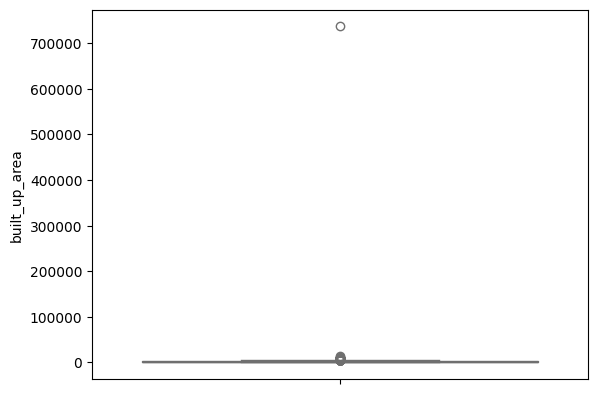

In [ ]:
sns.boxplot(df['built_up_area'],color = 'skyblue')

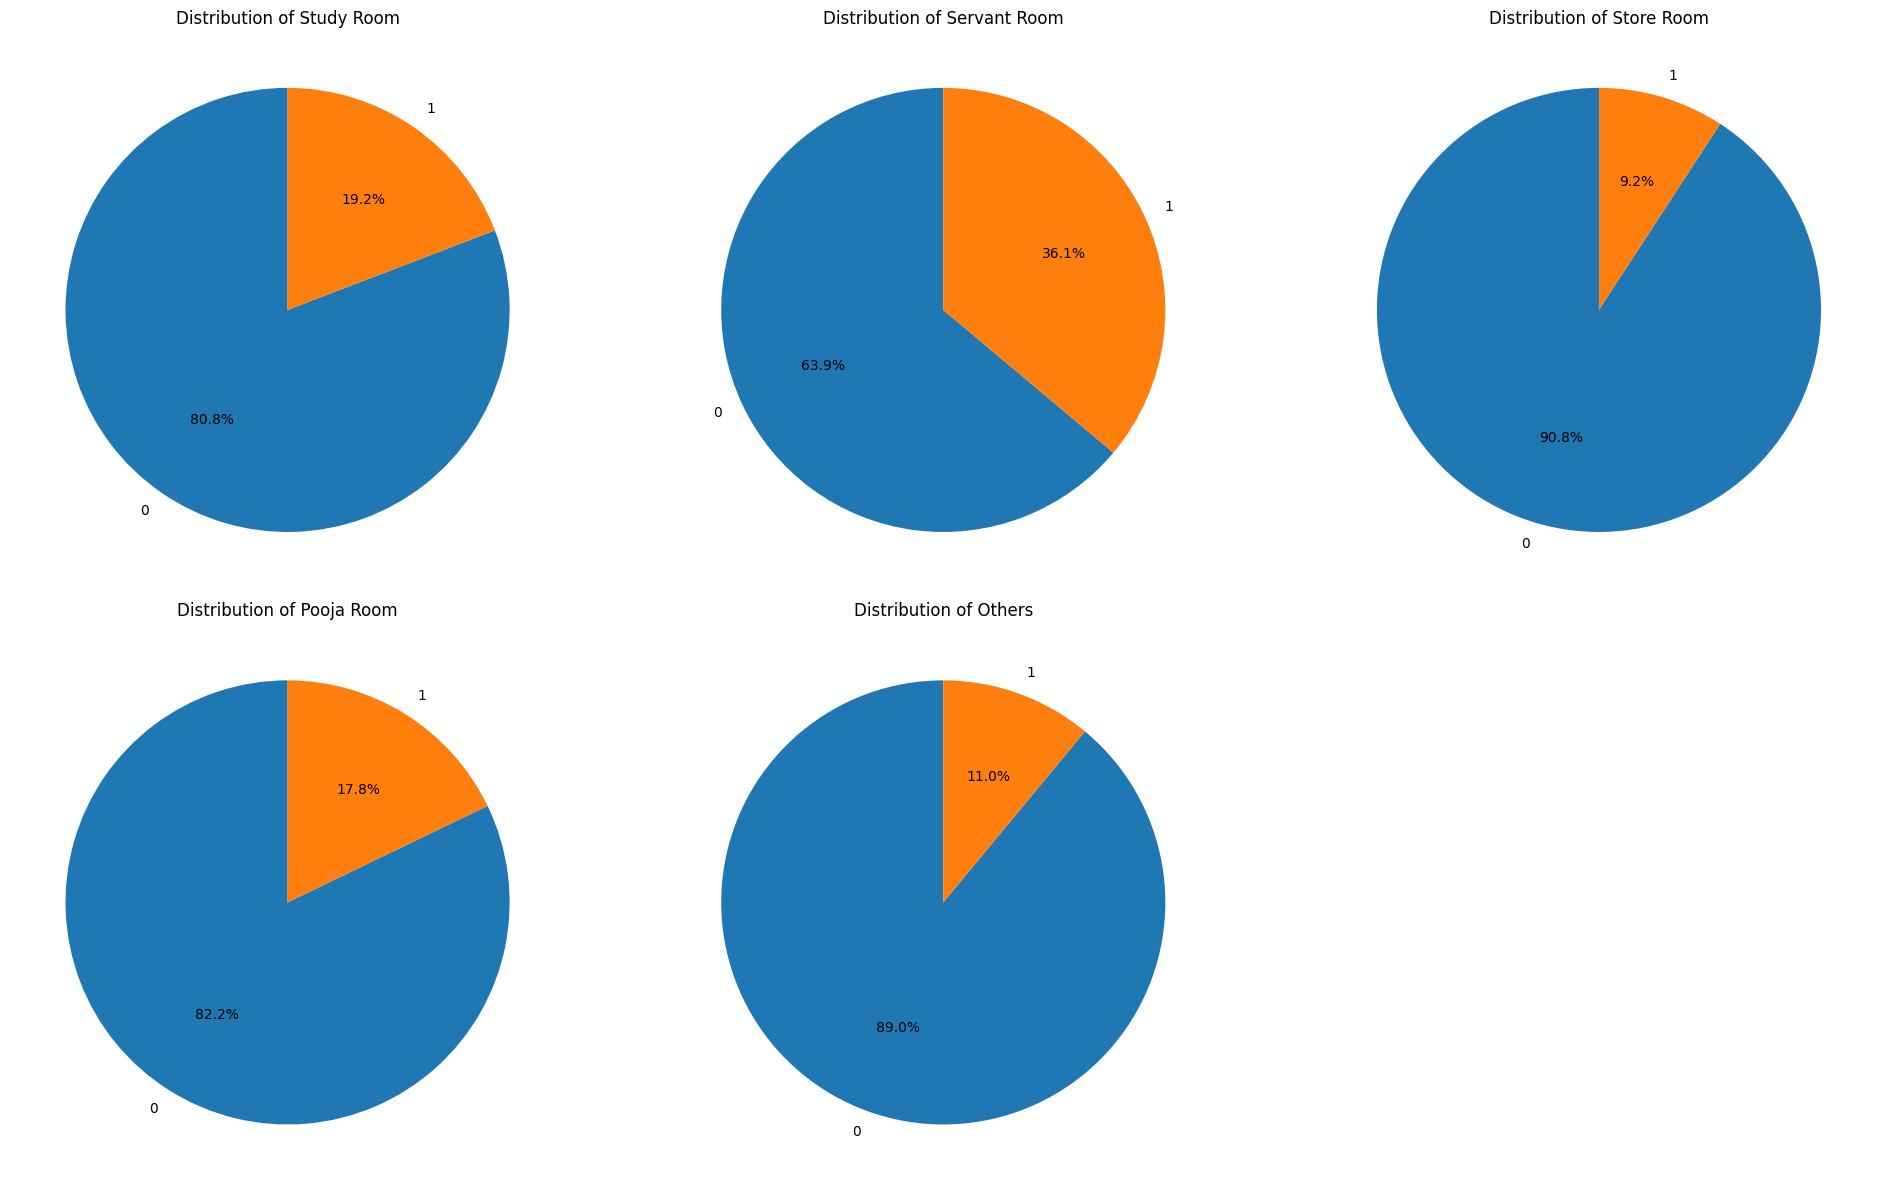

In [ ]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
df['furnishing_type'].value_counts()

,count
furnishing_type,
0,2411
1,1059
2,207


In [ ]:
df['luxury_score'].describe()

,luxury_score
count,3677.000000
mean,71.512918
std,53.059082
min,0.000000
25%,31.000000
50%,59.000000
75%,110.000000
max,174.000000


<Axes: xlabel='luxury_score', ylabel='Count'>

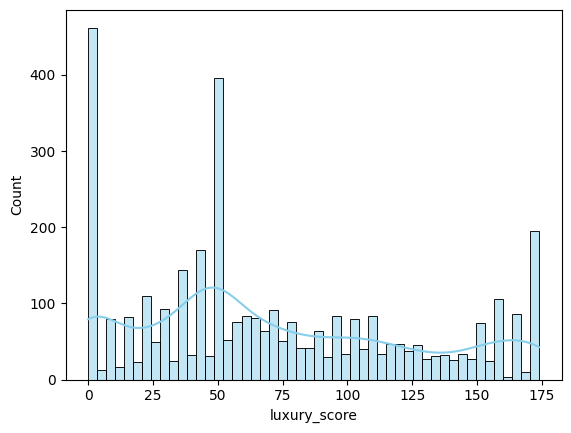

In [ ]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

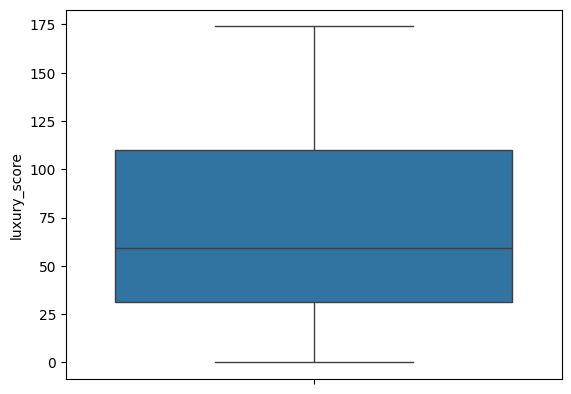

In [ ]:
sns.boxplot(df['luxury_score'])

luxury_score is a multi model graph having peak not once

#### MultiVariate Analysis

<Axes: xlabel='property_type', ylabel='price'>

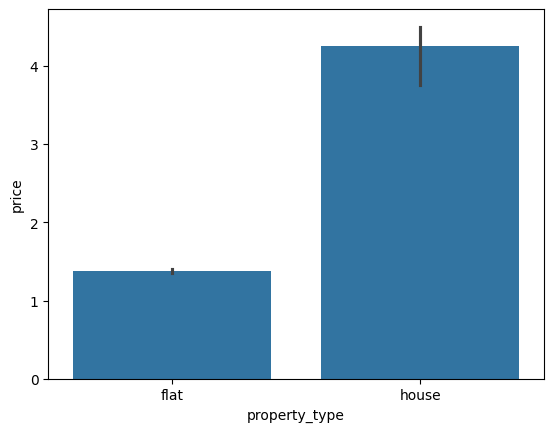

In [ ]:
sns.barplot(x = df['property_type'],y = df['price'],estimator = np.median)

individual houses are more costlier than flats

<Axes: xlabel='property_type', ylabel='built_up_area'>

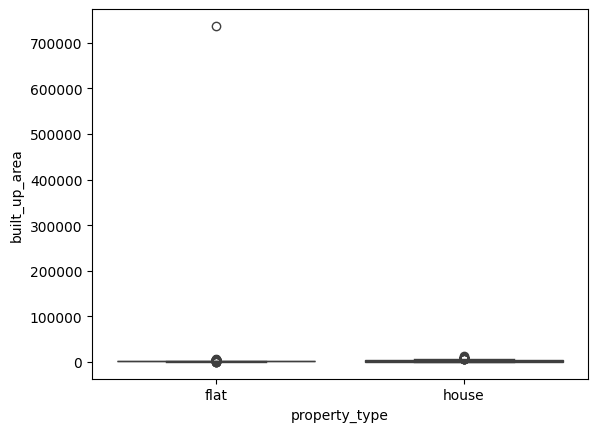

In [ ]:
import seaborn as sns
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

there is outlier which is disturbing the entire data

In [ ]:
df = df[df['built_up_area'] != 737147]

<Axes: xlabel='property_type', ylabel='built_up_area'>

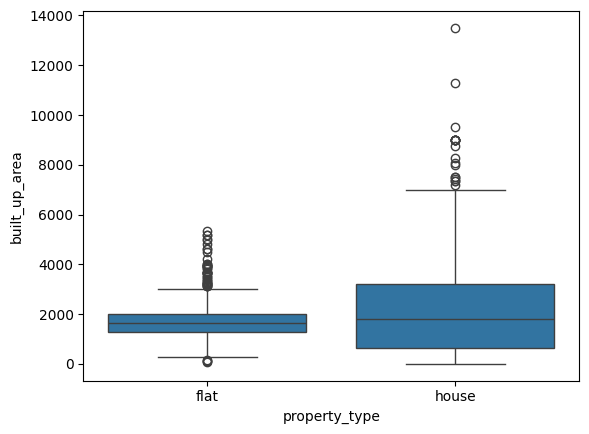

In [ ]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

houses are more areaed than flats

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

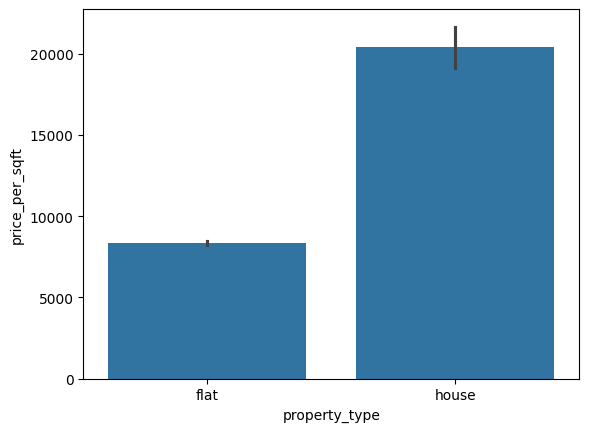

In [ ]:
sns.barplot(x=df['property_type'], y=df['price_per_sqft'], estimator=np.median)

the price per sqft is far more than flat it seems different has to be study

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

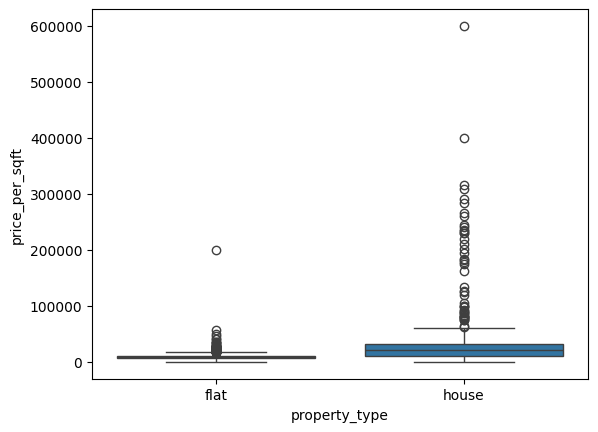

In [ ]:
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'])

price per sqft more than 10k is not normal so have to check them

In [ ]:
df[df['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,super_built_up_area,built_up_area,carpet_area
229,house,rk excelo,sector 12,0.60,120000.0,50.0,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...,NaN,30.0,15.0
336,house,independent,sector 28,4.50,125000.0,360.0,Built Up area: 360 (33.45 sq.m.),NaN,360.0,NaN
342,house,unitech nirvana birch court,sector 50,7.10,283333.0,251.0,Plot area 240(22.3 sq.m.),NaN,240.0,NaN
545,house,independent,sector 24,10.00,229885.0,435.0,Carpet area: 435 (40.41 sq.m.),NaN,NaN,435.0
867,house,ardee city,sector 52,5.50,183333.0,300.0,Plot area 300(27.87 sq.m.),NaN,300.0,NaN
975,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),NaN,232.0,NaN
1027,house,dlf the grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),NaN,270.0,NaN
1062,house,independent,sector 23,2.80,161849.0,173.0,Plot area 173(16.07 sq.m.)Built Up area: 160 s...,NaN,160.0,150.0
1259,house,vipul tatvam villa,sector 48,7.25,201388.0,360.0,Plot area 360(33.45 sq.m.),NaN,360.0,NaN
1385,house,unitech uniworld resorts,sector 33,9.50,173992.0,546.0,Plot area 546(50.73 sq.m.),NaN,546.0,NaN


due the error in the area conversion(it may be in sq m or yards) to make the value of area correct and correct the price per sqft col too

<Axes: xlabel='bedRoom', ylabel='property_type'>

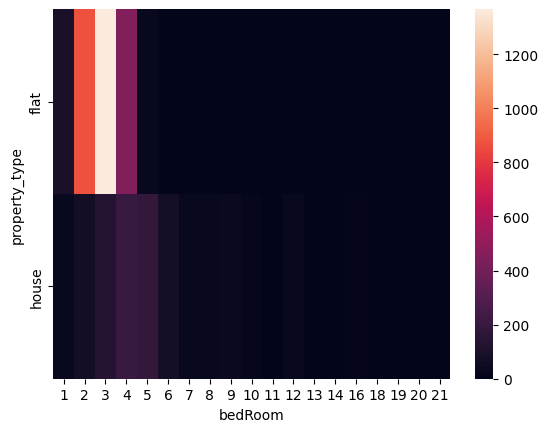

In [ ]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))

in flats bedrooms 2 3 4 and in houses bedrooms 3 4 5 are more and else are low

in bed rooms more than 100 there is problem that in that small area the no of bed rooms are much more than expected so has to be checked

In [ ]:
# checking outliers
df[df['bedRoom'] >= 10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
19,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,...,NaN,1440.0,NaN,0,1,0,0,0,2,70
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,...,NaN,115.0,NaN,0,0,0,0,1,0,7
66,house,independent,sector 13,0.50,90909.0,55.0,Plot area 55(5.11 sq.m.),12,4,3,...,NaN,55.0,NaN,0,0,0,0,0,0,15
78,house,independent,sector 17,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,...,NaN,7500.0,NaN,1,0,1,0,0,0,68
119,house,independent,sector 55,7.49,27741.0,2700.0,Plot area 300(250.84 sq.m.),12,12,3+,...,NaN,2700.0,NaN,1,1,0,1,0,1,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,house,independent,sector 25,NaN,NaN,NaN,Plot area 250(209.03 sq.m.)Built Up area: 260 ...,12,12,3+,...,NaN,260.0,245.0,1,1,0,1,1,2,144
3519,house,huda plot sector 38,sector 38,4.30,245398.0,175.0,Plot area 163(15.14 sq.m.)Built Up area: 145 s...,13,13,3+,...,NaN,145.0,NaN,0,0,0,0,0,2,7
3618,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,...,NaN,1161.0,NaN,0,1,0,0,0,2,49
3698,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,...,NaN,2700.0,NaN,0,1,0,1,0,1,49


<Axes: xlabel='property_type', ylabel='floorNum'>

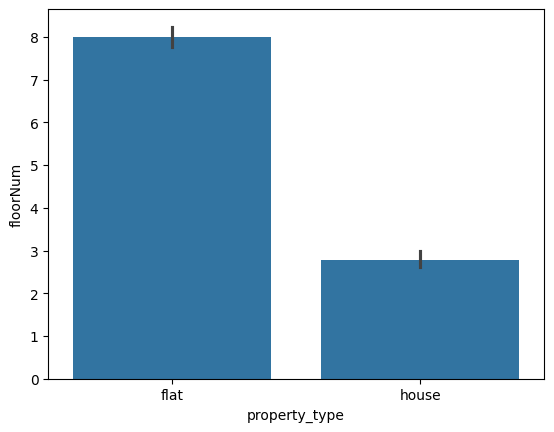

In [ ]:
sns.barplot(x=df['property_type'],y=df['floorNum'])

<Axes: xlabel='property_type', ylabel='floorNum'>

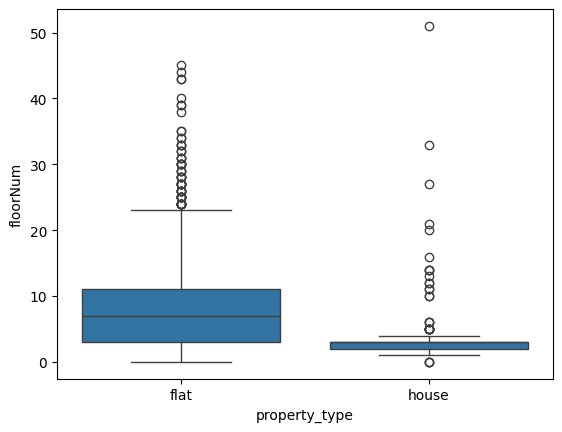

In [ ]:
sns.boxplot(x=df['property_type'],y=df['floorNum'])

there is also problem in the range of floorNum of houses because it is more for a house like it is situated at 50 th floor so has to be checked

<Axes: xlabel='agePossession', ylabel='property_type'>

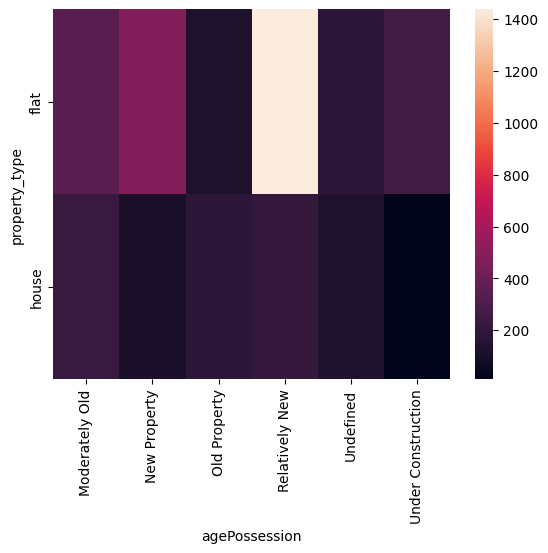

In [ ]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))

in flats there are more relatively new one ,new properties and moderately old cant see much variation in houses but the new houses and under construction are less than other categories in houses

<Axes: xlabel='bedRoom', ylabel='property_type'>

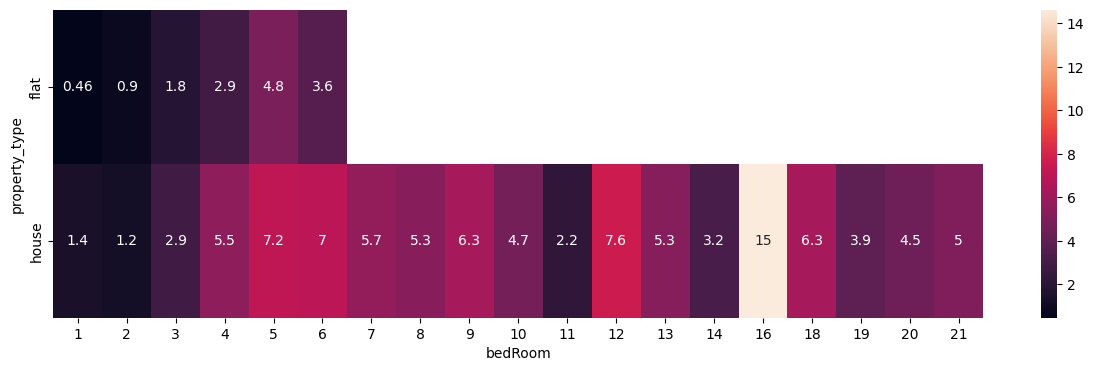

In [ ]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)

in flats there is clear observation as the no of bed rooms increase the price increases but in houses i see lot of variations so has to be check

<Axes: xlabel='furnishing_type', ylabel='property_type'>

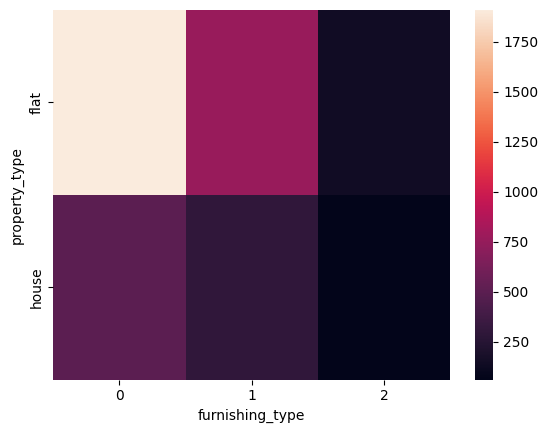

In [ ]:
sns.heatmap(pd.crosstab(df['property_type'],df['furnishing_type']))

<Axes: xlabel='furnishing_type', ylabel='property_type'>

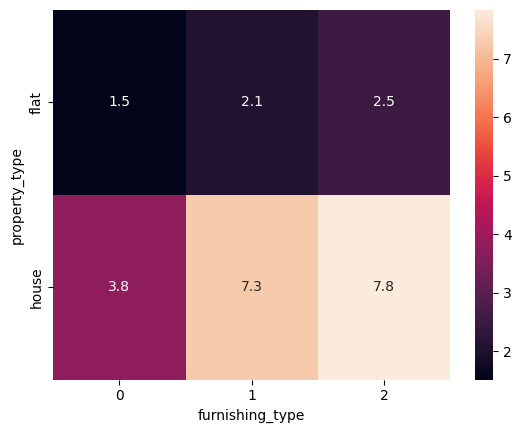

In [69]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)

clearly we can see the furnishing type 2 is lesser in quantity but more in price and reverse for the furnishing type 0

<Axes: xlabel='property_type', ylabel='luxury_score'>

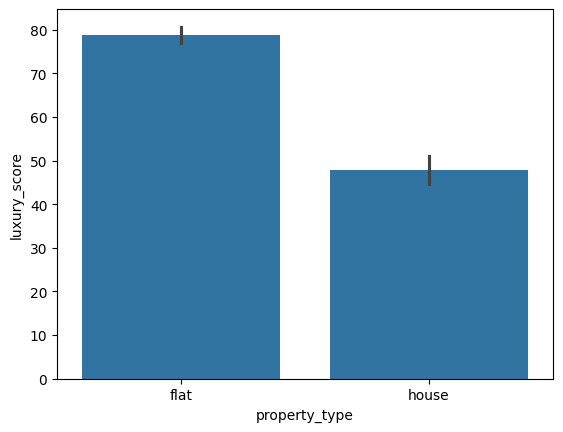

In [70]:
sns.barplot(x=df['property_type'],y=df['luxury_score'])

<Axes: xlabel='property_type', ylabel='luxury_score'>

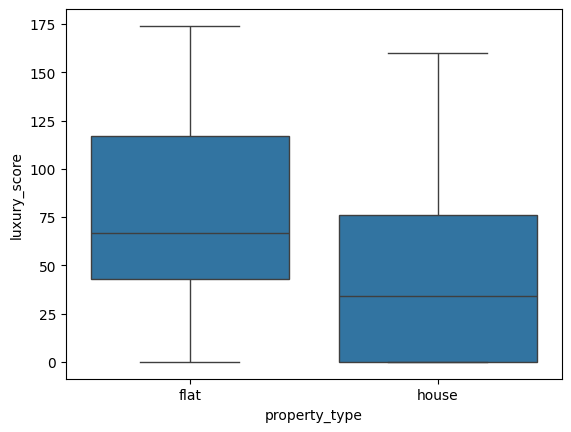

In [71]:
sns.boxplot(x=df['property_type'],y=df['luxury_score'])

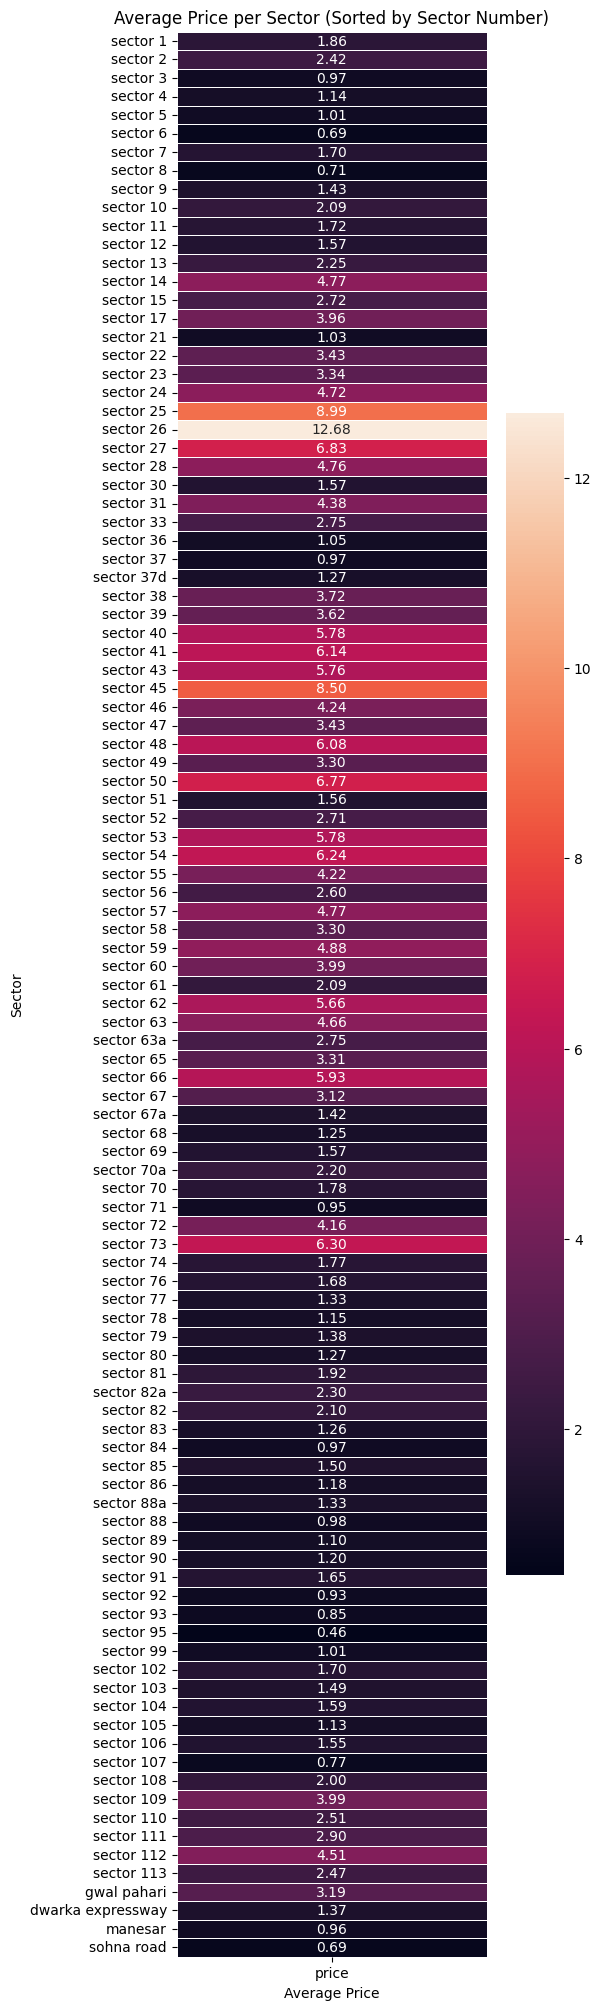

In [72]:
# sector analysis
import re
# Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

<Axes: xlabel='bedRoom', ylabel='price'>

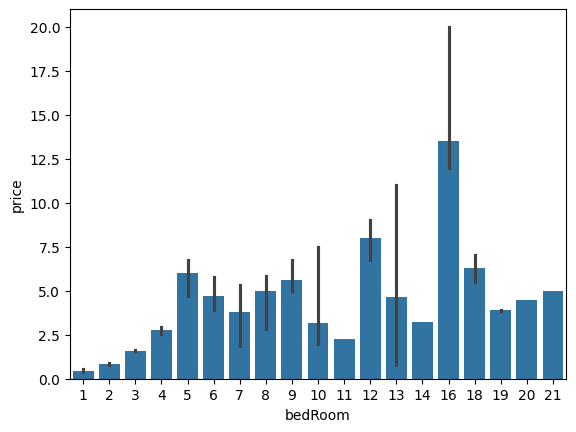

In [73]:
sns.barplot(x=df['bedRoom'],y=df['price'],estimator=np.median)

i can see increase value of price upto 5 and then it is not predictable so need to check

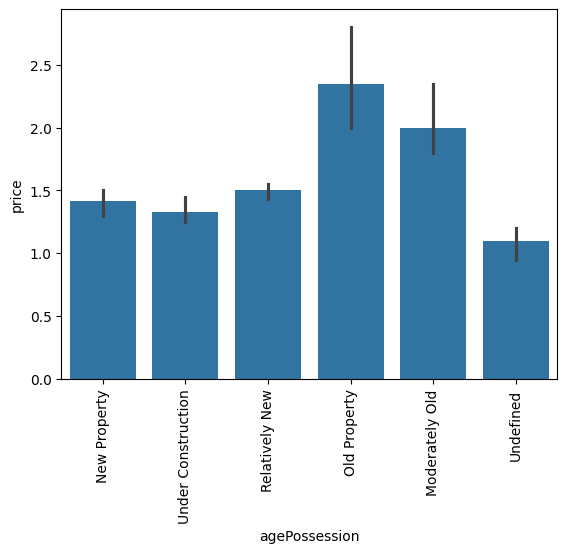

In [74]:
sns.barplot(x=df['agePossession'],y=df['price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

the old and moderately old properties are more costlier than new and under construction properties|

<Axes: xlabel='furnishing_type', ylabel='price'>

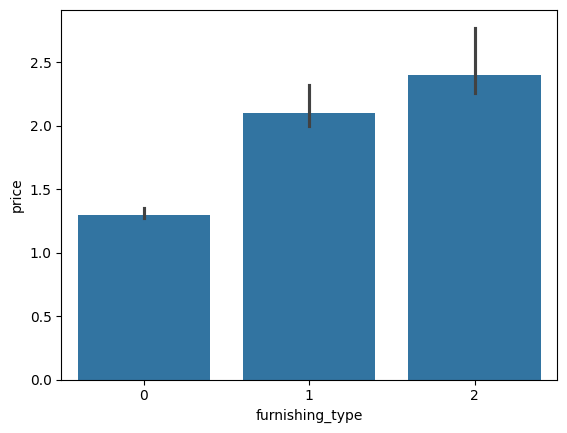

In [76]:
sns.barplot(x=df['furnishing_type'],y=df['price'],estimator=np.median)

<Axes: xlabel='luxury_score', ylabel='price'>

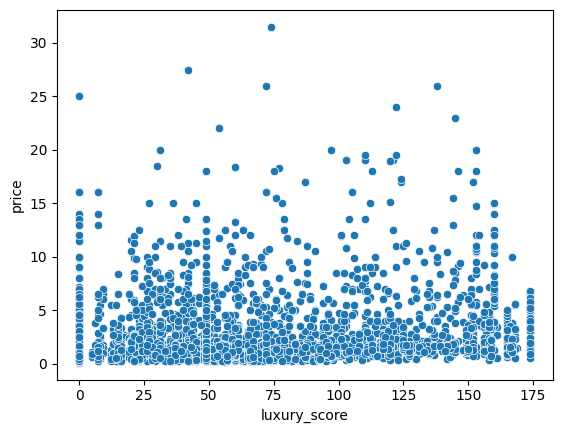

In [78]:
sns.scatterplot(x=df['luxury_score'],y=df['price'])

assumed that there must be a linear relation between price and luxary score but no!

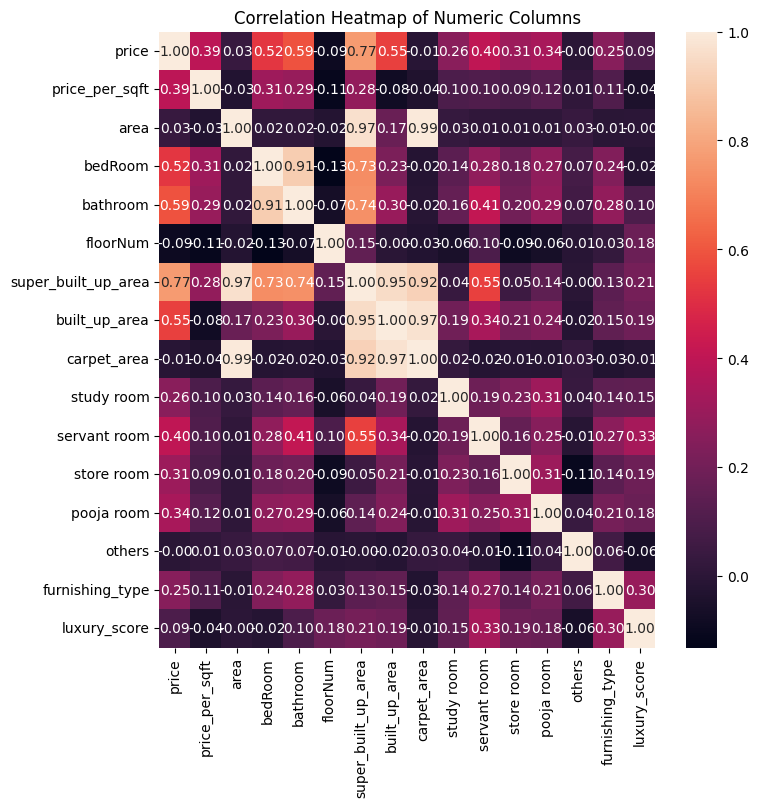

In [81]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [83]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

,price
price,1.000000
super_built_up_area,0.769412
bathroom,0.589826
built_up_area,0.551649
bedRoom,0.522925
servant room,0.400927
price_per_sqft,0.391251
pooja room,0.341492
store room,0.309121
study room,0.258602
